# Exploratory Data Analysis of an Exoplanet dataset


## Introduction

In this Notebook, I will carry out an Exploratory Data Analysis (EDA) based on the dataset with information about Exoplanets (remember that this analysis is the second step of the project and the emphasis is on first getting the raw data).

Otra opción de inicio: This Notebook makes up the second part of the project, which consists of exploring the data extracted and finding valuable insights. INCLUIR IMAGEN AL FINAL CHULA

The Notebook's structure is:
  
1.   **EDA**: a fundamental part for any data analysis, which can be divided in the following sections:

  > - Step 1
  > - Step 1
  > - Step 1
  > - Step 1
  > - Step 1
  > - Step 1
  > - Step 1
  
2.   **Insights**: based on the previous analysis
3.   **Conclusion**: my view on the entire project and other personal comments.






In [2]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

PATH = "/content/drive/MyDrive/Documentos/RawData&EDA/"
import os
os.chdir(PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## EDA

### Dataset information

Once everything is set, the analysis begins

In [4]:
# Loading the dataset
df = pd.read_csv("exoplanet_data.csv")
pd.set_option("display.max_columns", None)

In [5]:
df.head()
# IMPORTANT: the explanation of each attribute is on the "AttributesExplained.txt" file

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
0,OGLE-TR-10 b,OGLE-TR-10,1,1,0,0,Transit,2004,OGLE,3.101278,14.011,197.046,0.4,NaN,1344.9700
1,55 Cnc e,55 Cnc,2,5,0,0,Radial Velocity,2004,McDonald Observatory,2.808000,NaN,NaN,NaN,NaN,12.5855
2,BD-08 2823 b,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,5.600000,NaN,NaN,NaN,4.50,41.3342
3,BD-08 2823 c,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,237.600000,NaN,NaN,NaN,4.50,41.3342
4,HR 8799 c,HR 8799,1,4,0,0,Imaging,2008,Gemini Observatory,69000.000000,13.000,3000.000,NaN,0.06,41.2441


In [6]:
# Basic info

print(f'Data dimensions: {df.shape[0]} rows, {df.shape[1]} columns')
print('---------------------------------')

print(f'Types of attributes: \n{df.dtypes.value_counts()}')
print('---------------------------------')

print(f'Attribute per type: \n{df.dtypes}')


Data dimensions: 35181 rows, 15 columns
---------------------------------
Types of attributes: 
float64    6
int64      5
object     4
dtype: int64
---------------------------------
Attribute per type: 
pl_name             object
hostname            object
sy_snum              int64
sy_pnum              int64
sy_mnum              int64
cb_flag              int64
discoverymethod     object
disc_year            int64
disc_facility       object
pl_orbper          float64
pl_rade            float64
pl_masse           float64
pl_dens            float64
st_age             float64
sy_dist            float64
dtype: object


In [7]:
# Statistical information for numerical variables

df.describe()

,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
count,35181.000000,35181.000000,35181.0,35181.000000,35181.000000,3.211000e+04,24211.000000,3607.000000,1881.000000,7132.000000,34359.000000
mean,1.081976,1.878883,0.0,0.002246,2015.301299,1.359459e+04,5.303669,723.725349,2.794426,4.571783,739.503195
std,0.303644,1.193584,0.0,0.047334,3.781024,2.244698e+06,70.262559,1505.228689,5.739811,3.552458,778.399024
min,1.000000,1.000000,0.0,0.000000,1992.000000,9.070629e-02,0.270000,0.020000,0.010000,0.000000,1.301190
25%,1.000000,1.000000,0.0,0.000000,2014.000000,4.460782e+00,1.550000,15.400000,0.511000,2.100000,304.645000
50%,1.000000,1.000000,0.0,0.000000,2016.000000,1.052629e+01,2.280000,186.876000,1.130000,3.985000,613.129000
75%,1.000000,2.000000,0.0,0.000000,2016.000000,2.747856e+01,3.230000,624.534390,3.200000,5.890000,961.405000
max,4.000000,8.000000,0.0,1.000000,2023.000000,4.020000e+08,4282.980000,25426.400000,140.000000,16.800000,8800.000000


sy_mnum, which refers to the number of moons the exoplanet has, is always constant. In other words, there is no change in the data provided. It won't add any insight to the problem and therefore should be deleted.

In [8]:
# Null values (count and %)

null_values = pd.DataFrame()
null_values['#'] = df.isnull().sum()
null_values['%'] = null_values['#'] / len(df)
null_values

,#,%
pl_name,0,0.000000
hostname,0,0.000000
sy_snum,0,0.000000
sy_pnum,0,0.000000
sy_mnum,0,0.000000
cb_flag,0,0.000000
discoverymethod,0,0.000000
disc_year,0,0.000000
disc_facility,0,0.000000
pl_orbper,3071,0.087291


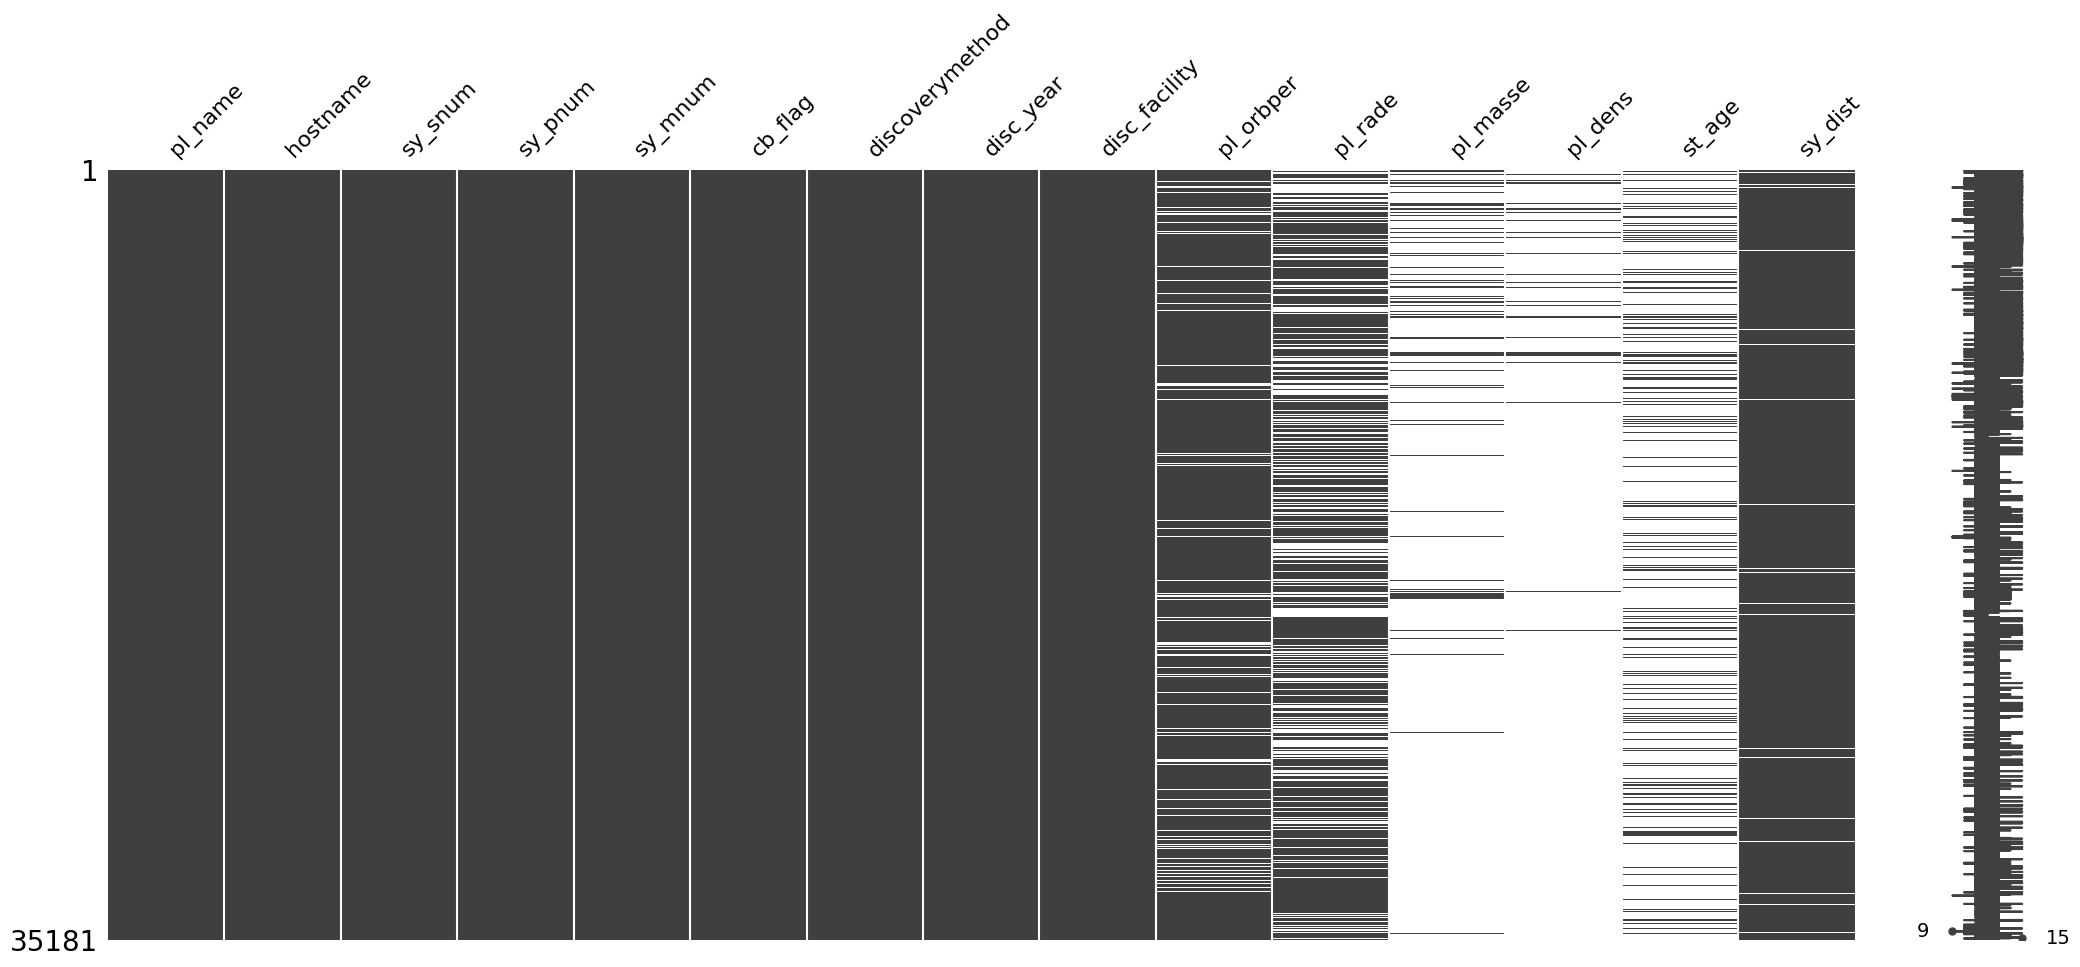

In [9]:
# Null values visualization
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(df)
plt.show()

The mass and density of the exoplanet, as well as the age of the host star are mostly Null. They can't add valuable information, so it might be better to delete them.

At around 30% of null values it also stands the radius of the exoplanet, pl_rade, as well as the time the planet takes to make a complete orbit around the host star, pl_orber, which reaches almost 10%. Since the dataset is small, I'm going to substitute the missing values with the mean of the rest of the data in each attribute as an imputation method.

In [10]:
# Replace Null values with the mean
mean_value = df['pl_rade'].mean()
df['pl_rade'].fillna(mean_value, inplace=True)


mean_value = df['pl_orbper'].mean()
df['pl_orbper'].fillna(mean_value, inplace=True)

In [11]:
df.head()

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
0,OGLE-TR-10 b,OGLE-TR-10,1,1,0,0,Transit,2004,OGLE,3.101278,14.011000,197.046,0.4,NaN,1344.9700
1,55 Cnc e,55 Cnc,2,5,0,0,Radial Velocity,2004,McDonald Observatory,2.808000,5.303669,NaN,NaN,NaN,12.5855
2,BD-08 2823 b,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,5.600000,5.303669,NaN,NaN,4.50,41.3342
3,BD-08 2823 c,BD-08 2823,1,2,0,0,Radial Velocity,2009,La Silla Observatory,237.600000,5.303669,NaN,NaN,4.50,41.3342
4,HR 8799 c,HR 8799,1,4,0,0,Imaging,2008,Gemini Observatory,69000.000000,13.000000,3000.000,NaN,0.06,41.2441


Now I'm going to take a closer look to categorical variables, which are discoverymethod and disc_facility. Let's take a look to the unique values of each of these and determine which are most frequent (I'm not going to consider either planet name or host name because they are just names that identify the objects, but don't give any information worth analysing).

In [12]:
# Categorical variable discoverymethod
df['discoverymethod'].value_counts()

Transit                          31766
Radial Velocity                   2473
Microlensing                       618
Transit Timing Variations          132
Imaging                            131
Eclipse Timing Variations           23
Orbital Brightness Modulation       20
Pulsar Timing                       12
Astrometry                           3
Pulsation Timing Variations          2
Disk Kinematics                      1
Name: discoverymethod, dtype: int64

In [13]:
# Categorical variable disc_facility
df['disc_facility'].value_counts()

Kepler                                          26607
K2                                               1924
Transiting Exoplanet Survey Satellite (TESS)      978
SuperWASP                                         829
W. M. Keck Observatory                            620
                                                ...  
Teide Observatory                                   1
KOINet                                              1
Very Long Baseline Array                            1
James Webb Space Telescope (JWST)                   1
NASA Infrared Telescope Facility (IRTF)             1
Name: disc_facility, Length: 70, dtype: int64

In both of them there is one value that repeats a lot more than the other. I believe a good approach in this case is to keep the 2 most frequent categories for each variable, and then add a 3rd category that groups the rest of instances. I'm going to use Label encoding since the number of columns added are not many.

In [14]:
# discoverymethod

all_attr_discoverymethod = df['discoverymethod'].unique().tolist() #transform all the discoverymethod values to a list
rest_attr_discoverymethod = all_attr_discoverymethod[2:] #take as an array the ones that are going to be in the Other category

#assign numbers to the 2 most frequent
dict_labels = {'Transit': 1, 'Radial Velocity': 2}

#and to the rest
for attr in rest_attr_discoverymethod:
  dict_labels[attr] = 3

print(df.loc[0:10, 'discoverymethod'])
print(all_attr_discoverymethod)
print(dict_labels)

#now I can use the map function to change the values on the dataframe according to the labels I've assigned
df['discoverymethod'] = df['discoverymethod'].map(dict_labels)

print(f'Label encoding of discoverymethod:\n {df.loc[0:10, "discoverymethod"]}')

0             Transit
1     Radial Velocity
2     Radial Velocity
3     Radial Velocity
4             Imaging
5     Radial Velocity
6     Radial Velocity
7     Radial Velocity
8     Radial Velocity
9     Radial Velocity
10    Radial Velocity
Name: discoverymethod, dtype: object
['Transit', 'Radial Velocity', 'Imaging', 'Transit Timing Variations', 'Microlensing', 'Orbital Brightness Modulation', 'Pulsar Timing', 'Astrometry', 'Eclipse Timing Variations', 'Pulsation Timing Variations', 'Disk Kinematics']
{'Transit': 1, 'Radial Velocity': 2, 'Imaging': 3, 'Transit Timing Variations': 3, 'Microlensing': 3, 'Orbital Brightness Modulation': 3, 'Pulsar Timing': 3, 'Astrometry': 3, 'Eclipse Timing Variations': 3, 'Pulsation Timing Variations': 3, 'Disk Kinematics': 3}
Label encoding of discoverymethod:
 0     1
1     2
2     2
3     2
4     3
5     2
6     2
7     2
8     2
9     2
10    2
Name: discoverymethod, dtype: int64


In [15]:
# To check if it's right, I can filter the df to search for the discoverymethod = 1 (the result matches the .unique() method from earlier)
filter = (df['discoverymethod'] == 1)
df[filter]

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
0,OGLE-TR-10 b,OGLE-TR-10,1,1,0,0,1,2004,OGLE,3.101278,14.011000,197.046,0.40,NaN,1344.9700
24,WASP-127 b,WASP-127,2,1,0,0,1,2016,SuperWASP,4.178062,5.303669,NaN,NaN,NaN,159.5070
30,TOI-4145 A b,TOI-4145 A,2,1,0,0,1,2023,Transiting Exoplanet Survey Satellite (TESS),4.066445,12.183000,NaN,NaN,NaN,205.3870
34,HD 235088 b,HD 235088,1,1,0,0,1,2023,Transiting Exoplanet Survey Satellite (TESS),7.434102,1.990000,NaN,NaN,NaN,41.1706
35,TOI-2498 b,TOI-2498,1,1,0,0,1,2023,Transiting Exoplanet Survey Satellite (TESS),3.738252,6.060000,34.620,0.86,3.6,275.2650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35176,Kepler-1988 b,Kepler-1988,1,1,0,0,1,2023,Kepler,11.494404,5.303669,NaN,NaN,NaN,513.4260
35177,Kepler-1984 b,Kepler-1984,1,1,0,0,1,2023,Kepler,1.992812,0.690000,NaN,NaN,NaN,NaN
35178,Kepler-1994 b,Kepler-1994,1,1,0,0,1,2023,Kepler,4.612264,0.510000,NaN,NaN,12.9,241.9910
35179,Kepler-1979 b,Kepler-1979,1,1,0,0,1,2023,Kepler,18.508440,5.280000,NaN,NaN,NaN,1076.2700


Applying the same logic to disc_facility and  its values:

In [16]:
# disc_facility

all_attr_discfacility = df['disc_facility'].unique().tolist()
rest_attr_discfacility = [attr for attr in all_attr_discfacility if attr != 'Kepler' and attr != 'K2']

dict_labels = {'Kepler': 1, 'K2': 2}

for attr in rest_attr_discfacility:
  dict_labels[attr] = 3

print(df.loc[0:10, 'disc_facility'])

df['disc_facility'] = df['disc_facility'].map(dict_labels)

print(f'Label encoding of disc_facility:\n {df.loc[0:10, "disc_facility"]}')

0                                       OGLE
1                       McDonald Observatory
2                       La Silla Observatory
3                       La Silla Observatory
4                         Gemini Observatory
5          Okayama Astrophysical Observatory
6     Thueringer Landessternwarte Tautenburg
7          Okayama Astrophysical Observatory
8                           Lick Observatory
9                           Lick Observatory
10                          Lick Observatory
Name: disc_facility, dtype: object
Label encoding of disc_facility:
 0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
Name: disc_facility, dtype: int64


In [17]:
filter = (df['disc_facility'] == 2)
df[filter]

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,pl_masse,pl_dens,st_age,sy_dist
52,K2-371 b,K2-371,1,1,0,0,1,2022,2,3.114908,12.030000,NaN,NaN,NaN,442.8130
174,K2-371 b,K2-371,1,1,0,0,1,2022,2,3.115000,5.303669,NaN,NaN,NaN,442.8130
201,K2-415 b,K2-415,1,1,0,0,1,2023,2,4.017969,1.015000,7.5,NaN,NaN,21.8182
236,K2-148 b,K2-148,2,3,0,0,1,2018,2,4.383950,1.330000,NaN,NaN,NaN,124.4580
250,K2-415 b,K2-415,1,1,0,0,1,2023,2,4.017905,1.042000,NaN,NaN,NaN,21.8182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35089,K2-121 b,K2-121,1,1,0,0,1,2017,2,5.185761,7.500000,NaN,NaN,NaN,169.3980
35090,EPIC 211945201 b,EPIC 211945201,1,1,0,0,1,2018,2,19.491000,5.303669,NaN,NaN,NaN,181.6900
35091,EPIC 211945201 b,EPIC 211945201,1,1,0,0,1,2018,2,19.491830,5.960000,NaN,NaN,NaN,181.6900
35092,K2-275 b,K2-275,1,2,0,0,1,2018,2,3.280963,2.340000,NaN,NaN,NaN,123.4380


The 1924 rows with K2 as the disc_facility are now represented as 2.

After all the considerations above, I'm going to delete the variables that are not useful for the analysis.

In [18]:
# Variable elimination: pl_masse, pl_dense, st_age and sy_mnum
df.drop(['pl_masse', 'pl_dens','st_age', 'sy_mnum'], axis= 1,  inplace=True)

This is what the dataset looks like just before plotting:

In [19]:
df.head()

,pl_name,hostname,sy_snum,sy_pnum,cb_flag,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,sy_dist
0,OGLE-TR-10 b,OGLE-TR-10,1,1,0,1,2004,3,3.101278,14.011000,1344.9700
1,55 Cnc e,55 Cnc,2,5,0,2,2004,3,2.808000,5.303669,12.5855
2,BD-08 2823 b,BD-08 2823,1,2,0,2,2009,3,5.600000,5.303669,41.3342
3,BD-08 2823 c,BD-08 2823,1,2,0,2,2009,3,237.600000,5.303669,41.3342
4,HR 8799 c,HR 8799,1,4,0,3,2008,3,69000.000000,13.000000,41.2441


In [20]:
df.dtypes

pl_name             object
hostname            object
sy_snum              int64
sy_pnum              int64
cb_flag              int64
discoverymethod      int64
disc_year            int64
disc_facility        int64
pl_orbper          float64
pl_rade            float64
sy_dist            float64
dtype: object

### Plots

Let's take a look to what the number of stars in the planetary system looks like.

Text(0.5, 1.0, 'Number of stars each exoplanet has')

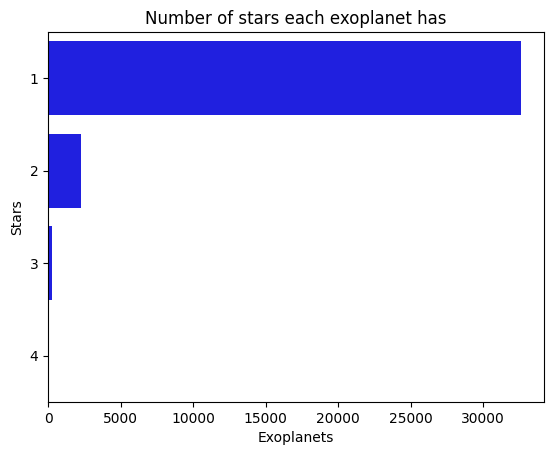

In [21]:
# Bar plot for sy_num
sns.countplot(y='sy_snum', data=df, color='blue')
plt.xlabel('Exoplanets')
plt.ylabel('Stars')
plt.title('Number of stars each exoplanet has')

In [22]:
# Count plot for

In [ ]:
# Relationship between the discovery method and the year of discovery
sns.scatterplot(x='disc_year', y='discoverymethod', data=df)
plt.xlabel('Year')
plt.ylabel('Discovery Method')
plt.title('title')

Text(0.5, 1.0, 'title')

In [ ]:
# Most used discovery method (sneak peek from the label encoding)
sns.countplot(x='discoverymethod', data=df)
plt.xlabel('Methods')
plt.ylabel('Count')
plt.title('Most used discovery method')

In [ ]:
# Facility with most discoveries
sns.countplot(x='disc_facility', data=df)
plt.xlabel('Methods')
plt.ylabel('Count')
plt.title('Most used discovery method')

In [1]:
# Histogram distribution for float variables
sns.histplot(df['pl_orbper'], bins= 5)

NameError: name 'sns' is not defined

In [ ]:
# Histograms of the float variables

In [ ]:
# Scatterplot with pl_orbper and pl_rade

In [ ]:
# Distances to the exoplanets system (max and min)

In [ ]:
# Distances and the year of discovery?

<ipython-input-20-906fabe94af7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlación entre variables')

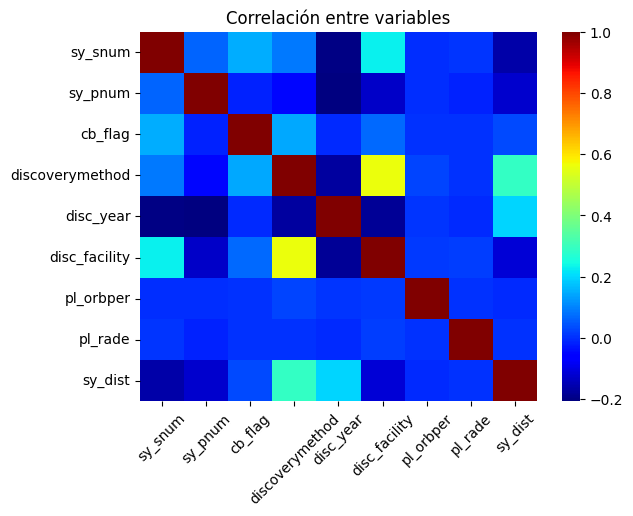

In [ ]:
# Heatmap
corr = df.corr()
sns.heatmap(corr, cmap='jet') #Con la librería seaborn podemos crear el tipo de gráfico Heatmap, que muestra las correlaciones entre variables
plt.xticks(rotation=45)
plt.title('Correlación entre variables')

## Insights

texto

## Conclusion

texto conclusión